In [1]:
import os
import sys
def getRepoPath():
    cwd = os.getcwd()
    delimiter = "\\" if "\\" in cwd else "/"
    repoPath = delimiter.join(cwd.split(delimiter)[:cwd.split(delimiter).index("dataImport")]) + delimiter
    return repoPath
repoPath = getRepoPath()
sys.path.append(repoPath + 'dataImport/')
from utils import workingDataPath, getWorkingHRDfParquet
import pandas as pd

appleHRDf = getWorkingHRDfParquet('apple')
polarHRDf = getWorkingHRDfParquet('polar')
fitbitHRDf = getWorkingHRDfParquet('fitbit')

In [6]:
from datetime import datetime, date, time, timedelta
import pytz
import matplotlib.pyplot as plt
def graphMultiHRDate(HRDfs, forDate, deviceNames, cutOffTime = time(12,0,0), timezone = 'US/Arizona'):
    graphTimeStart = pytz.timezone(timezone).localize(datetime.combine(forDate - timedelta(days=1), cutOffTime))
    graphTimeEnd = graphTimeStart + timedelta(days=1)

    fig, ax = plt.subplots(figsize=(16.0, 4.0))

    plt.gca().set_title("HR for " + ",".join(deviceNames) + " for " + str(forDate))
    plt.gca().set_ylim([30,210])
    plt.gca().set_xlim([graphTimeStart, graphTimeEnd])
    plt.ylabel("Heart Rate")
    plt.xlabel("Time")
    xFormatter = plt.matplotlib.dates.DateFormatter('%H:%M', tz=pytz.timezone(timezone))
    plt.gca().xaxis.set_major_formatter(xFormatter)

    legend1 = []
    for deviceIndex in range(len(deviceNames)):
        # prepping HR
        HRdf = HRDfs[deviceIndex]
        HRdf['sampleDT'] = pd.to_datetime(HRdf.index)
        HRDfForDay = HRdf[(HRdf['sampleDT'] < graphTimeEnd) &
                        (HRdf['sampleDT'] > graphTimeStart)]

        HRTimes = [HRDfForDay.iloc[rowIndex]['sampleDT'] for rowIndex in range(len(HRDfForDay))]
        HRValues = [HRDfForDay.iloc[rowIndex]['value'] for rowIndex in range(len(HRDfForDay))]
        
        ax.plot(HRTimes, HRValues, label=deviceNames[deviceIndex], alpha=.7, linewidth=.7)


    plt.legend(loc="upper left")
    plt.show()




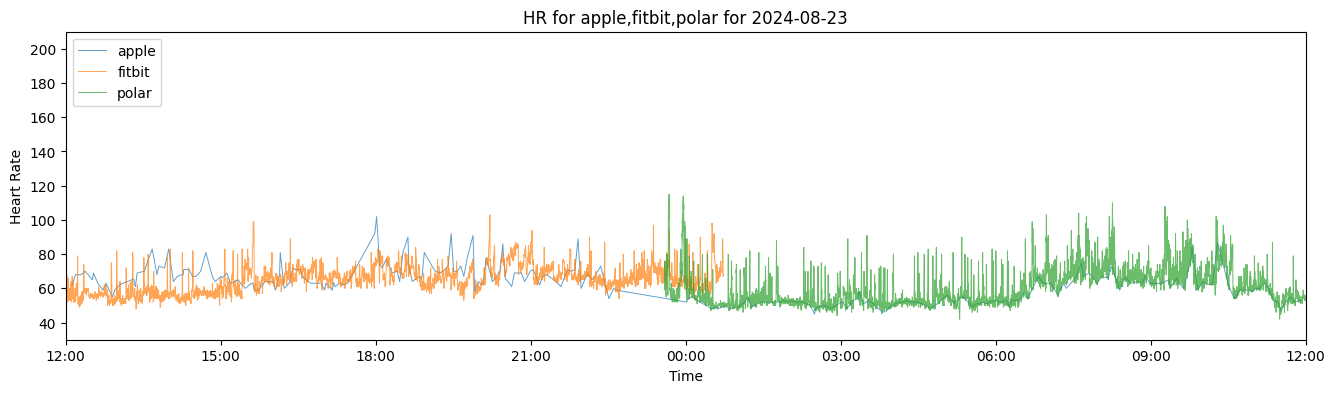

In [9]:
graphMultiHRDate([appleHRDf, fitbitHRDf, polarHRDf], date(2024,8,23), ['apple', 'fitbit', 'polar'])